Importing necessary  libraries required

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

loading data using Pandas 

In [17]:
data = pd.read_excel("Omnify-Analyst-Intership-Task.xlsx")

In [18]:
data.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [19]:
data.rename(columns={'Week':'Date'},inplace=True)

In [20]:
# Converting "Date" column to datetime format

data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y')


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     8 non-null      object        
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memo

In [22]:
# checking for null values

data.isnull().sum()

Date                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      6
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

In [23]:
# removing least significant feature

columns_to_remove = ["Payment ($)", "Payment Date","Currency"]
data = data.drop(columns_to_remove, axis=1)


In [24]:
# droping null values

data =data.dropna()

In [25]:
data.isnull().sum()

Date              0
Campaign          0
Ad group          0
Keyword type      0
Search Keyword    0
Clicks            0
Impressions       0
Cost ($)          0
Leads             0
Prospects         0
Country           0
dtype: int64

In [26]:
data.describe()

,Clicks,Impressions,Cost ($),Leads,Prospects
count,412.000000,412.000000,412.000000,412.000000,412.000000
mean,0.929612,16.851942,6.692306,0.029126,0.050971
std,1.913557,47.054195,14.343953,0.168365,0.287322
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,12.000000,6.642500,0.000000,0.000000
max,12.000000,357.000000,92.090000,1.000000,3.000000


In [27]:
data.describe(include='all')

,Date,Campaign,Ad group,Keyword type,Search Keyword,Clicks,Impressions,Cost ($),Leads,Prospects,Country
count,412,412,412,412,412,412.000000,412.000000,412.000000,412.000000,412.000000,412
unique,15,15,27,3,20,NaN,NaN,NaN,NaN,NaN,1
top,2021-02-15 00:00:00,EK_Generic_Swimming,Reservation_Management_System_Phrase,Exact,reservation management system,NaN,NaN,NaN,NaN,NaN,USA
freq,33,91,91,184,90,NaN,NaN,NaN,NaN,NaN,412
first,2021-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-05-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,0.929612,16.851942,6.692306,0.029126,0.050971,NaN
std,NaN,NaN,NaN,NaN,NaN,1.913557,47.054195,14.343953,0.168365,0.287322,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN


In [28]:
# Setting  the "Date" column as the index for time series analysis

data.set_index('Date', inplace=True)

In [29]:
# Ad Performance Analysis
ad_performance = data[['Clicks', 'Impressions', 'Cost ($)']]
ad_performance_weekly = ad_performance.resample('W').sum()
ad_performance_monthly = ad_performance.resample('M').sum()

In [30]:
print("Ad Performance - Weekly:")
print(ad_performance_weekly)


Ad Performance - Weekly:
            Clicks  Impressions  Cost ($)
Date                                     
2021-01-31      15          319    154.79
2021-02-07      19          373    192.58
2021-02-14      21          364    216.13
2021-02-21      35          671    235.30
2021-02-28      22          478    190.90
2021-03-07      14          407    141.40
2021-03-14      34          502    258.20
2021-03-21      21          465    177.41
2021-03-28      45          656    294.82
2021-04-04      39          586    172.11
2021-04-11      28          460    170.14
2021-04-18      24          324    137.21
2021-04-25      19          327     87.38
2021-05-02      17          487    103.26
2021-05-09      30          524    225.60

Ad Perfor+mance - Monthly:
            Clicks  Impressions  Cost ($)
Date                                     
2021-01-31      15          319    154.79
2021-02-28      97         1886    834.91
2021-03-31     153         2616   1043.94
2021-04-30      88     

In [31]:
print("\nAd Perfor+mance - Monthly:")
print(ad_performance_monthly)


Ad Perfor+mance - Monthly:
            Clicks  Impressions  Cost ($)
Date                                     
2021-01-31      15          319    154.79
2021-02-28      97         1886    834.91
2021-03-31     153         2616   1043.94
2021-04-30      88         1598    497.99
2021-05-31      30          524    225.60


In [32]:
# Lead and Prospect Generation Analysis
lead_prospect_generation = data[['Leads', 'Prospects']]
lead_prospect_generation_weekly = lead_prospect_generation.resample('W').sum()
lead_prospect_generation_monthly = lead_prospect_generation.resample('M').sum()


In [33]:
print("\nLead and Prospect Generation - Weekly:")
print(lead_prospect_generation_weekly)


Lead and Prospect Generation - Weekly:
            Leads  Prospects
Date                        
2021-01-31      1          2
2021-02-07      0          1
2021-02-14      0          1
2021-02-21      0          2
2021-02-28      0          1
2021-03-07      0          1
2021-03-14      3          1
2021-03-21      1          0
2021-03-28      1          4
2021-04-04      0          0
2021-04-11      2          0
2021-04-18      1          4
2021-04-25      1          1
2021-05-02      1          0
2021-05-09      1          3


In [34]:
print("\nLead and Prospect Generation - Monthly:")
print(lead_prospect_generation_monthly)



Lead and Prospect Generation - Monthly:
            Leads  Prospects
Date                        
2021-01-31      1          2
2021-02-28      0          5
2021-03-31      5          6
2021-04-30      5          5
2021-05-31      1          3


In [35]:
# Geographical Impact Analysis
geographical_impact = data.groupby('Country').sum()

In [37]:
print("\nGeographical Impact:")
print(geographical_impact)


Geographical Impact:
         Clicks  Impressions  Cost ($)  Leads  Prospects
Country                                                 
USA         383         6943   2757.23     12         21


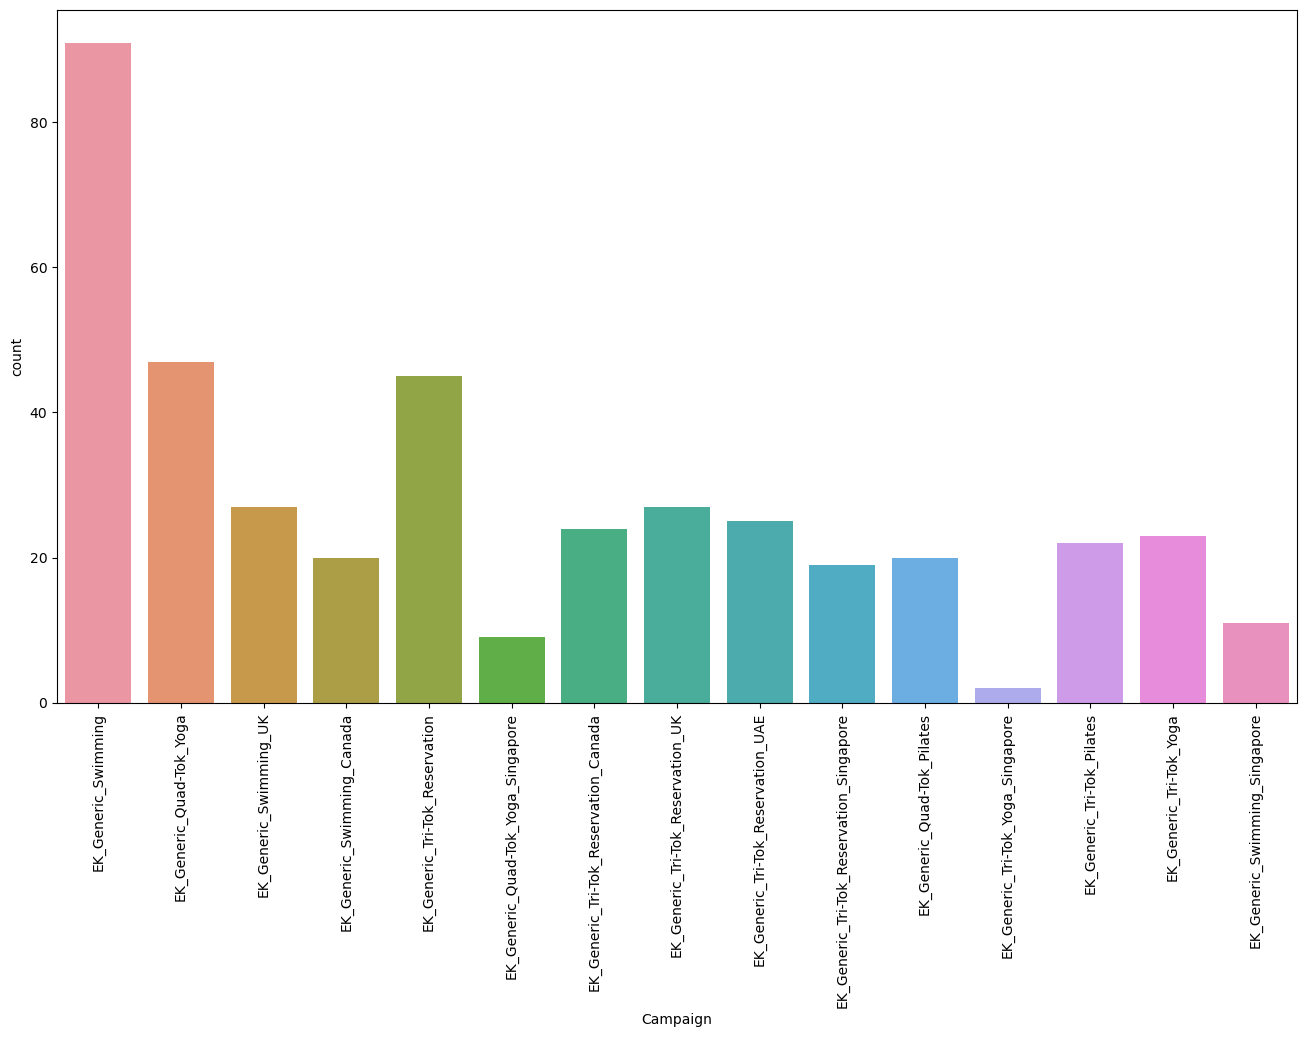

In [38]:
#plot  count of campaigns
fig = plt.subplots(figsize=(16,9))

sns.countplot(data=data,x='Campaign')
plt.xticks(rotation=90);

The above graph shows the count of each and every campaign we have done  
'EK_Generic_Swimming' is most  counted campaign and 'EK_Generic_Tri-Tok_Yoga_Singapore' is Least Counted

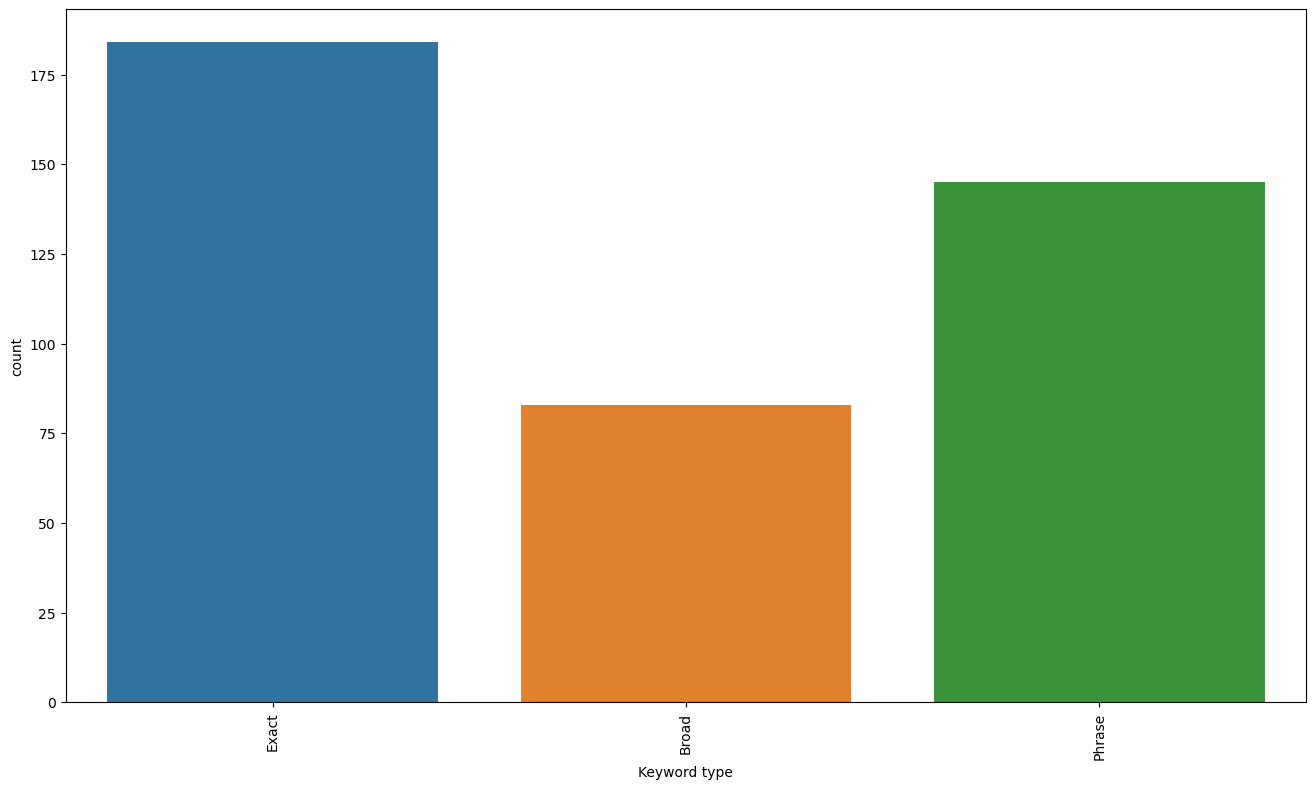

In [40]:
# plot count of  keywordtype
fig = plt.subplots(figsize=(16,9))

sns.countplot(data=data,x='Keyword type')
plt.xticks(rotation=90);

in this data there is  'Exact' Key_word more than 175, 'Broad' more thane 80, and 'Phrase' more than 130

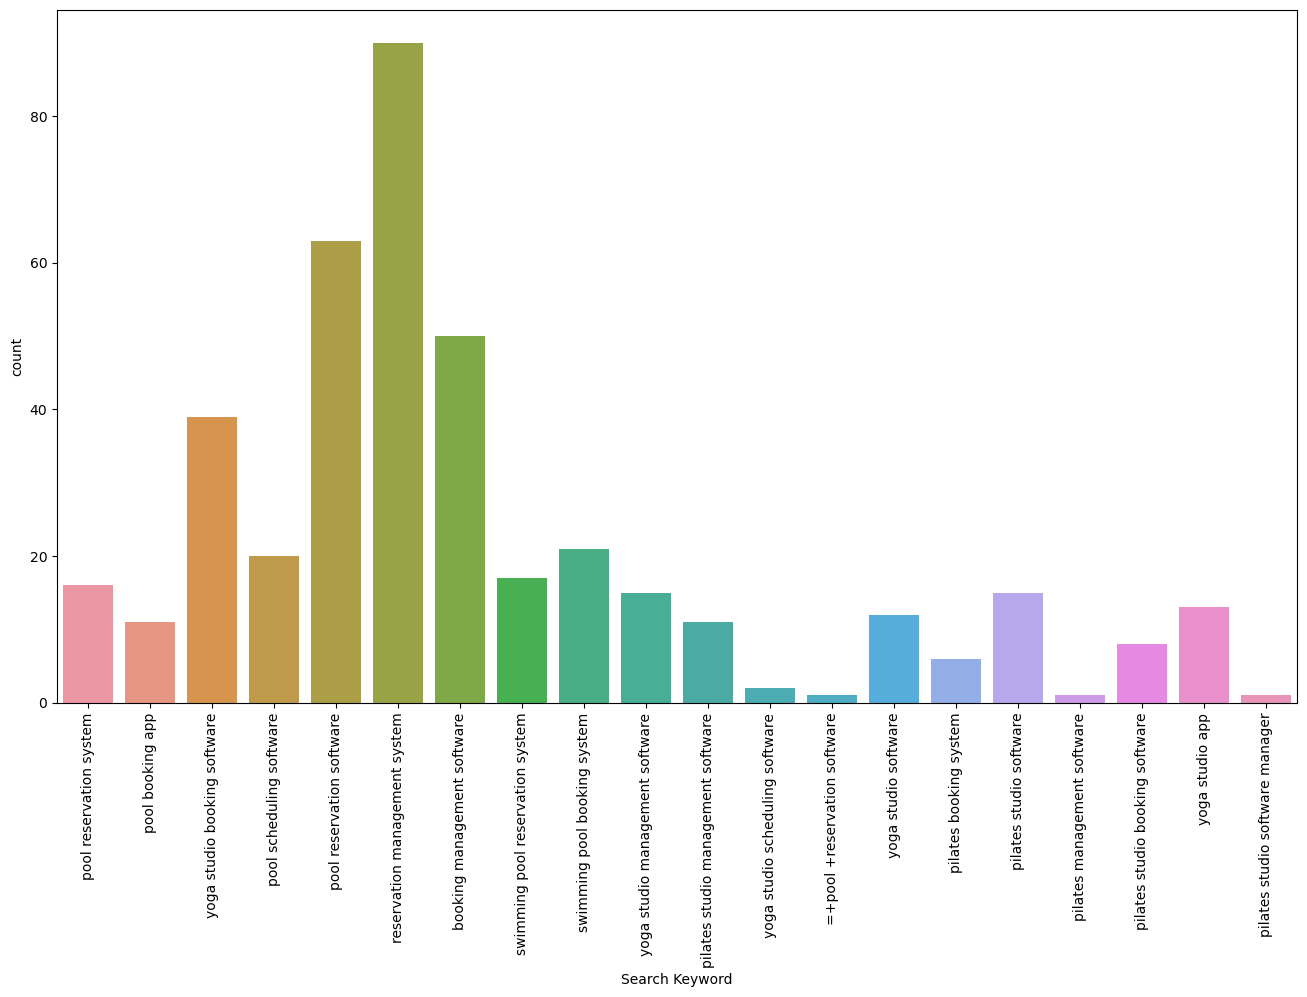

In [41]:
#plot  count of searchkeyword
fig = plt.subplots(figsize=(16,9))

sns.countplot(data=data,x='Search Keyword')
plt.xticks(rotation=90);

'reservation managemnet system is the most searched key word
'=+pool+reservation software','pilates managemnet software','pilates studio software manger' are some least count search keyword

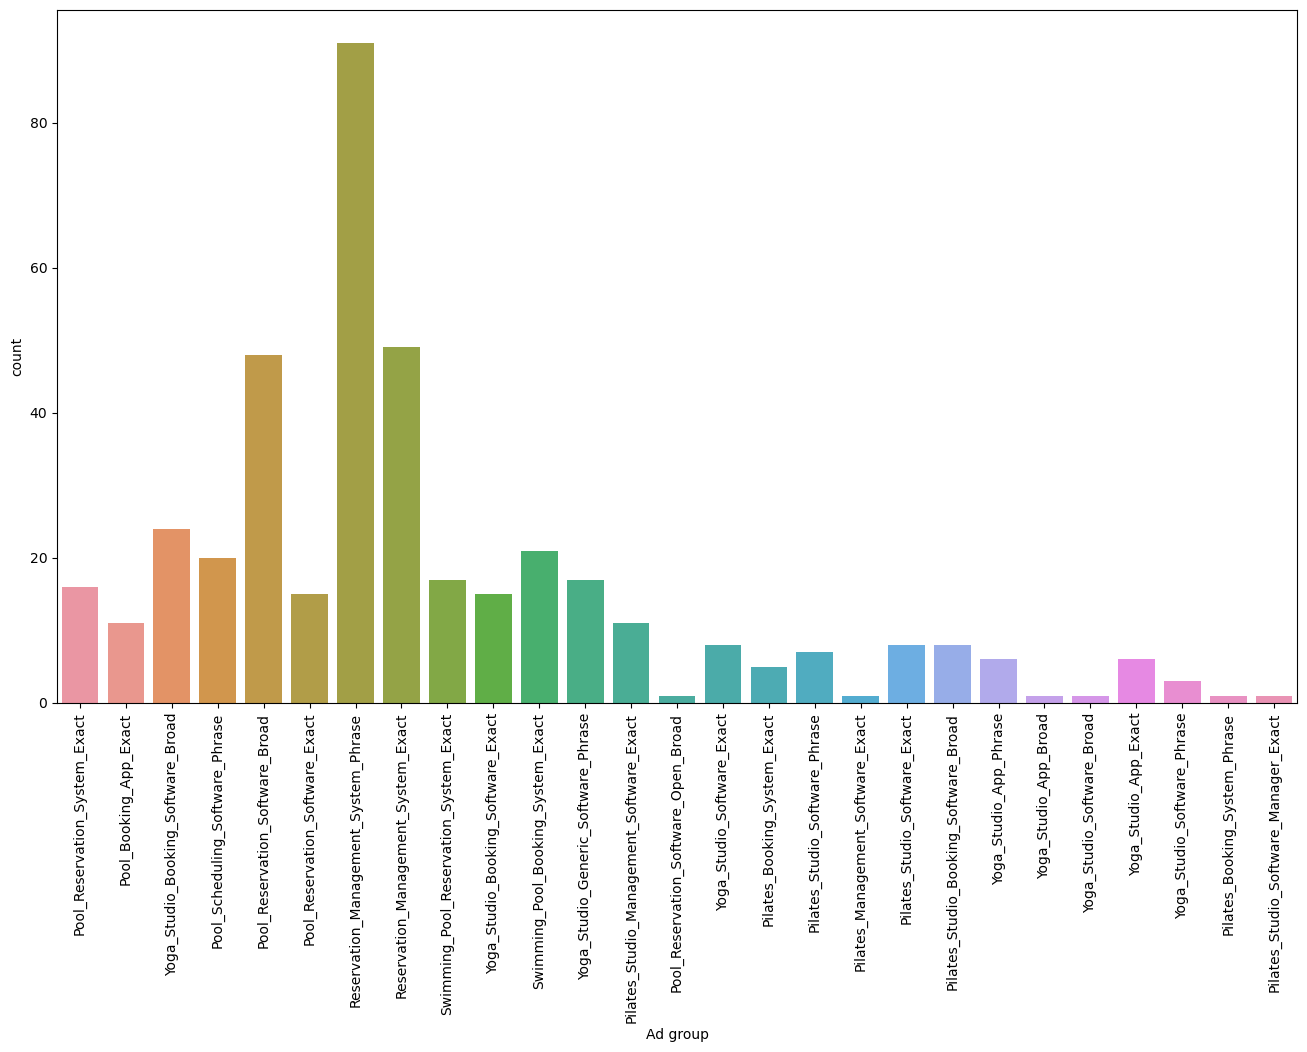

In [42]:
# plot count of Adgroup
fig = plt.subplots(figsize=(16,9))

sns.countplot(data=data,x='Ad group')
plt.xticks(rotation=90);


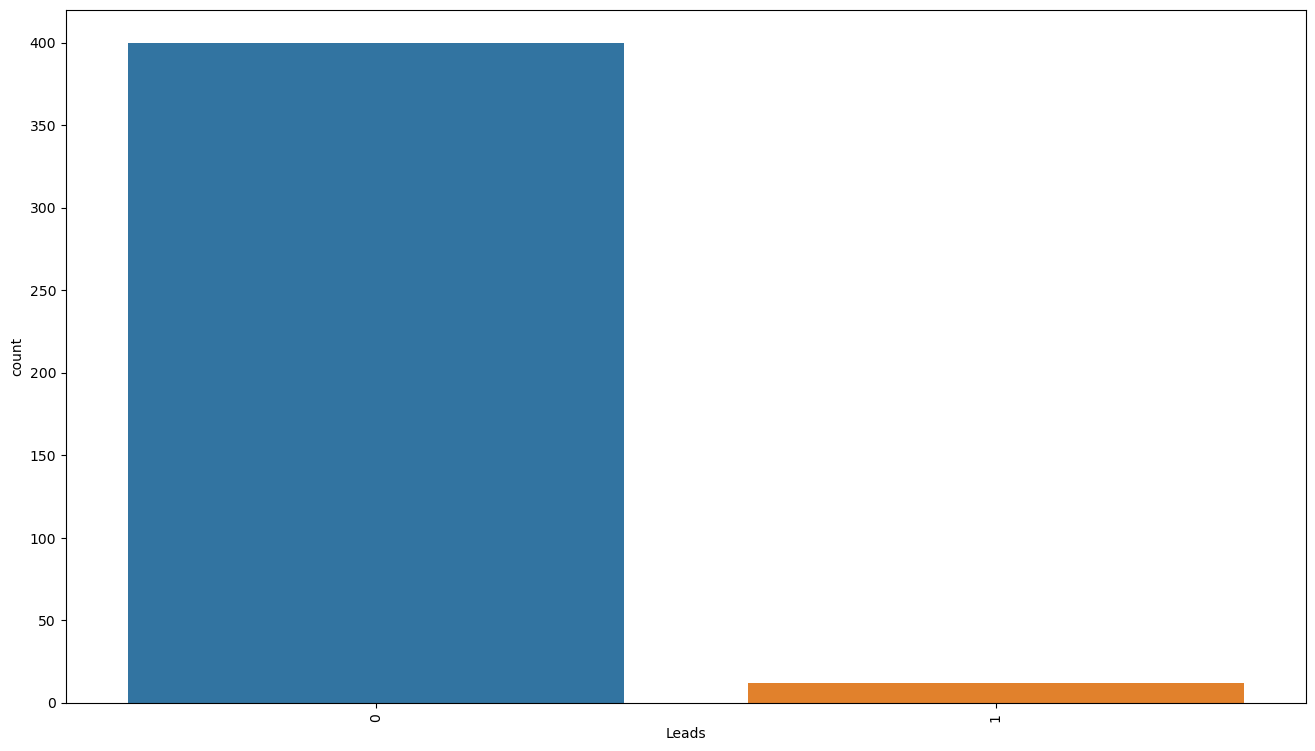

In [39]:
# plot counts of Leads
fig = plt.subplots(figsize=(16,9))

sns.countplot(data=data,x='Leads')
plt.xticks(rotation=90);

from above plot we can assumes that the lead from the campaings are not giving the result that  we want

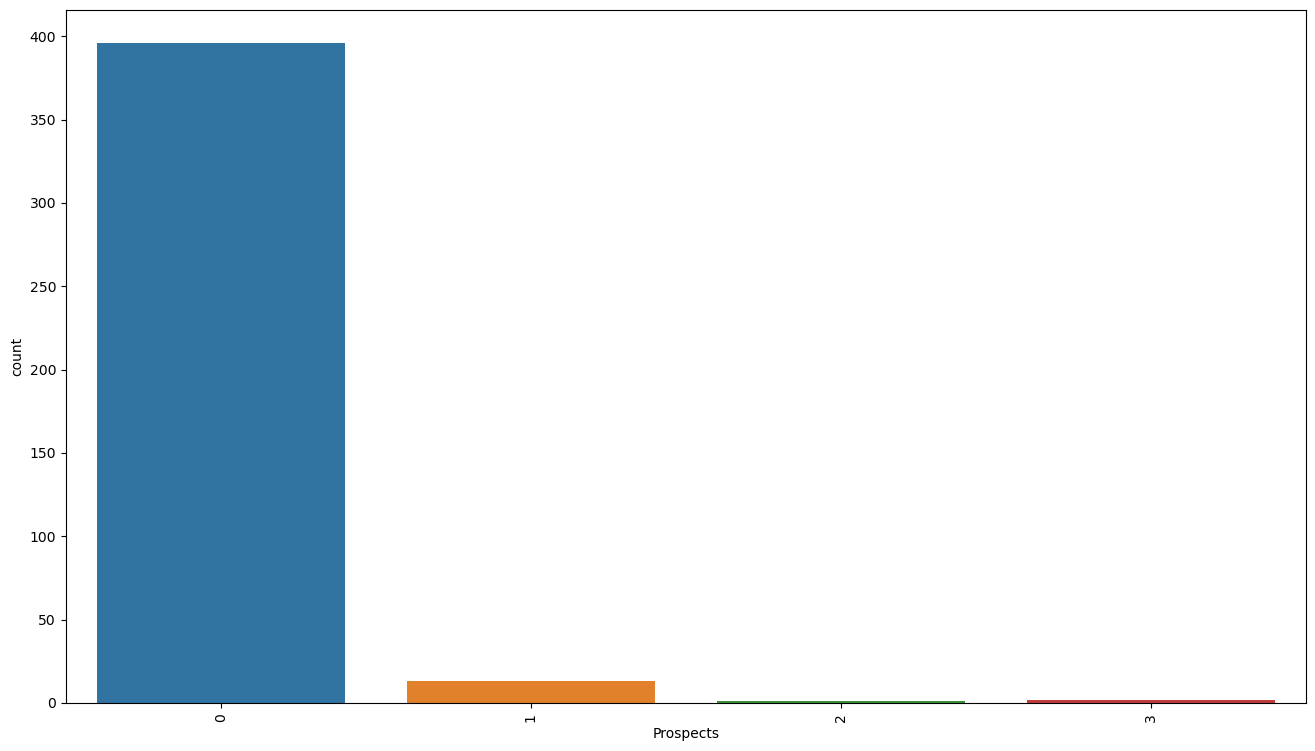

In [43]:
#plot count of Prospects
fig = plt.subplots(figsize=(16,9))

sns.countplot(data=data,x='Prospects')
plt.xticks(rotation=90);

due to  lack of leads prospect is also low

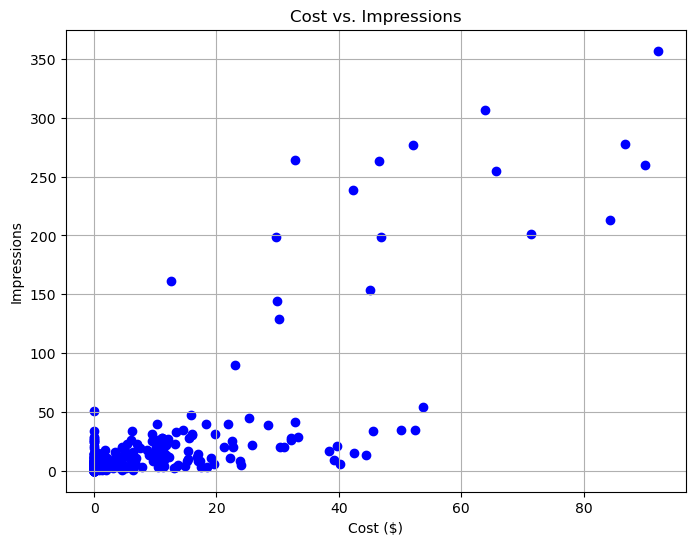

In [44]:
# ploting the relation between cost and impression
plt.figure(figsize=(8, 6))
plt.scatter(data['Cost ($)'], data['Impressions'], marker='o', color='b')
plt.xlabel('Cost ($)')
plt.ylabel('Impressions')
plt.title('Cost vs. Impressions')
plt.grid(True)
plt.show()

This scatter plot gives us the relation between cost and impressio 
from this  we can clarify that if we spent a midrange cost on Ad we would get a better impression

<Axes: >

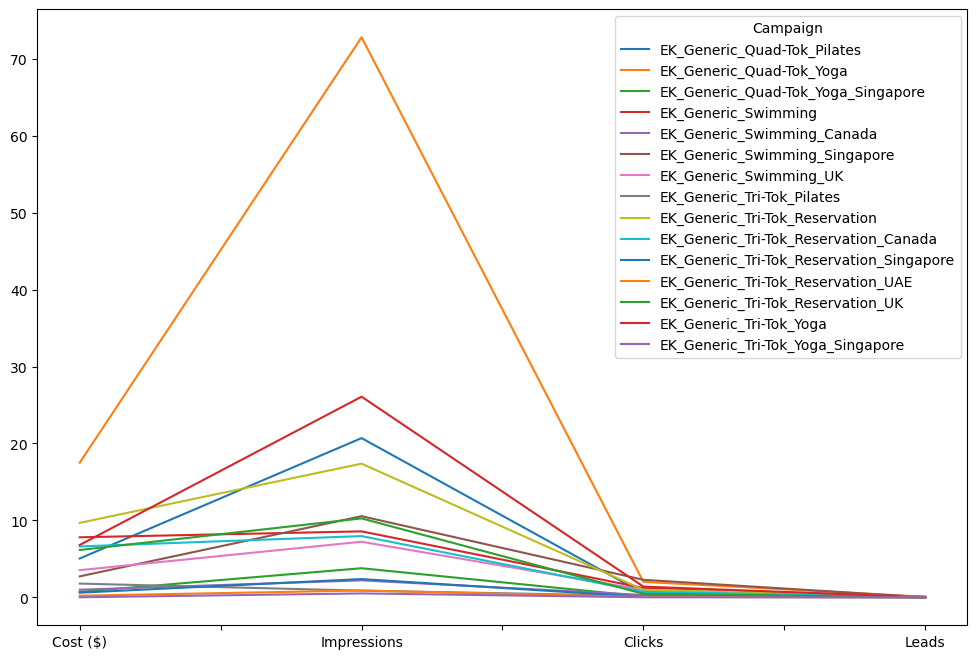

In [49]:
data.groupby('Campaign')[['Cost ($)','Impressions','Clicks','Leads']].mean().T.plot(figsize=(12,8))

This plot shows the effect of each and every campaign with cost,impression,clicks,and leads

# Summary

=> From the above data and the graphs plotted we can assume that the Camapign are not much affecting the sales,clicks and leads to our product 

=> when we are spending some cost on camapigns there is little bit improvment in impression  but  we cant make this impression to a good clicks or leads

=>so we want to comeup with the new strategies and creative ads to improve our perfomance